In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
headers = ["status", "duration", "credit_history", "purpose", "credit_amount", "savings_account", "present_employment", "installment_rate","personal_status_sex", "guarantors", "residence", "property", "age", "installment_plan", "housing", "existing_credits", "job", "liables", "telephone", "foreign", "class"]

In [3]:
df = pd.read_csv("/Users/Peeradon/Desktop/SoftDev_DSAI/SC348810-Software-Development-and-Project-Management-for-Data-Science-and-Artificial-Intelligence/punch/dataset/german.csv",sep=' ', names=headers)
df.shape

(1000, 21)

In [4]:
df.head()

,status,duration,credit_history,purpose,credit_amount,savings_account,present_employment,installment_rate,personal_status_sex,guarantors,...,property,age,installment_plan,housing,existing_credits,job,liables,telephone,foreign,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   status               1000 non-null   object
 1   duration             1000 non-null   int64 
 2   credit_history       1000 non-null   object
 3   purpose              1000 non-null   object
 4   credit_amount        1000 non-null   int64 
 5   savings_account      1000 non-null   object
 6   present_employment   1000 non-null   object
 7   installment_rate     1000 non-null   int64 
 8   personal_status_sex  1000 non-null   object
 9   guarantors           1000 non-null   object
 10  residence            1000 non-null   int64 
 11  property             1000 non-null   object
 12  age                  1000 non-null   int64 
 13  installment_plan     1000 non-null   object
 14  housing              1000 non-null   object
 15  existing_credits     1000 non-null   int64 
 16  job    

In [6]:
# check for uniqueness
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns], columns=['Column_Name', 'Num_Unique'])
unique_counts

,Column_Name,Num_Unique
0,status,4
1,duration,33
2,credit_history,5
3,purpose,10
4,credit_amount,921
5,savings_account,5
6,present_employment,5
7,installment_rate,4
8,personal_status_sex,4
9,guarantors,3


In [7]:
def objectToCat(df):
    tmp = df.copy()
    for col in tmp.columns:
        if np.dtype(tmp[col]) == "object":
            tmp[col] = tmp[col].astype("category")
    return tmp

In [8]:
df_cat = objectToCat(df)
df_cat['class'] = np.where(df_cat['class'] == 1,1,0)  # remap class -> good = 1 , bad = 0
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   status               1000 non-null   category
 1   duration             1000 non-null   int64   
 2   credit_history       1000 non-null   category
 3   purpose              1000 non-null   category
 4   credit_amount        1000 non-null   int64   
 5   savings_account      1000 non-null   category
 6   present_employment   1000 non-null   category
 7   installment_rate     1000 non-null   int64   
 8   personal_status_sex  1000 non-null   category
 9   guarantors           1000 non-null   category
 10  residence            1000 non-null   int64   
 11  property             1000 non-null   category
 12  age                  1000 non-null   int64   
 13  installment_plan     1000 non-null   category
 14  housing              1000 non-null   category
 15  existing_credits     1

In [9]:
# checking null
df_cat.isnull().sum()

status                 0
duration               0
credit_history         0
purpose                0
credit_amount          0
savings_account        0
present_employment     0
installment_rate       0
personal_status_sex    0
guarantors             0
residence              0
property               0
age                    0
installment_plan       0
housing                0
existing_credits       0
job                    0
liables                0
telephone              0
foreign                0
class                  0
dtype: int64

### Data Visualization

In [10]:
df_cat.describe()

,duration,credit_amount,installment_rate,residence,age,existing_credits,liables,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


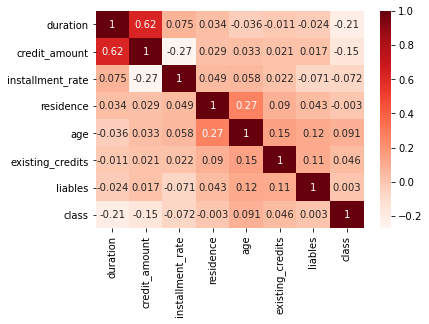

In [11]:
# checking numerical feature correlation
sns.heatmap(df_cat.corr(), annot=True, cmap = 'Reds')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit_amount'>

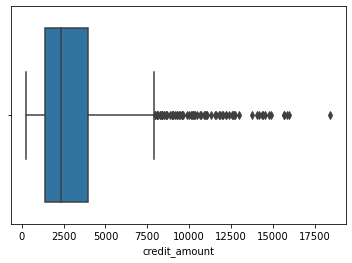

In [12]:
sns.boxplot(df_cat['credit_amount'])

In [13]:
# Position of the Outlier
outliers = np.where(df_cat['credit_amount']>15000)
print("outliers -> ", outliers[0])
# Position of the Outlier
print("before drop outlier -> ", df_cat.shape)
df_cat.drop(outliers[0], inplace=True)
print("after drop outlier -> ", df_cat.shape)

outliers ->  [ 95 637 818 887 915]
before drop outlier ->  (1000, 21)
after drop outlier ->  (995, 21)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


class values count
1    698
0    297
Name: class, dtype: int64


<AxesSubplot:xlabel='class', ylabel='count'>

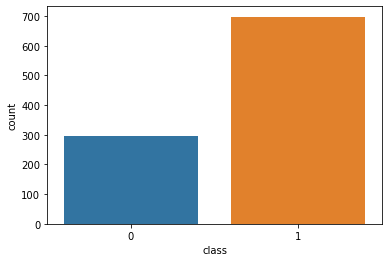

In [14]:
print("class values count")
print(df_cat['class'].value_counts())
sns.countplot('class', data=df_cat)

In [15]:
TARGET = 'class'
FEATURES = df_cat.columns.drop(TARGET)
CATEGORICAL = df_cat[FEATURES].select_dtypes('category').columns
print(f"Categorical features: {', '.join(CATEGORICAL)}")

Categorical features: status, credit_history, purpose, savings_account, present_employment, personal_status_sex, guarantors, property, installment_plan, housing, job, telephone, foreign


###  class (good) varies for different Categorical features

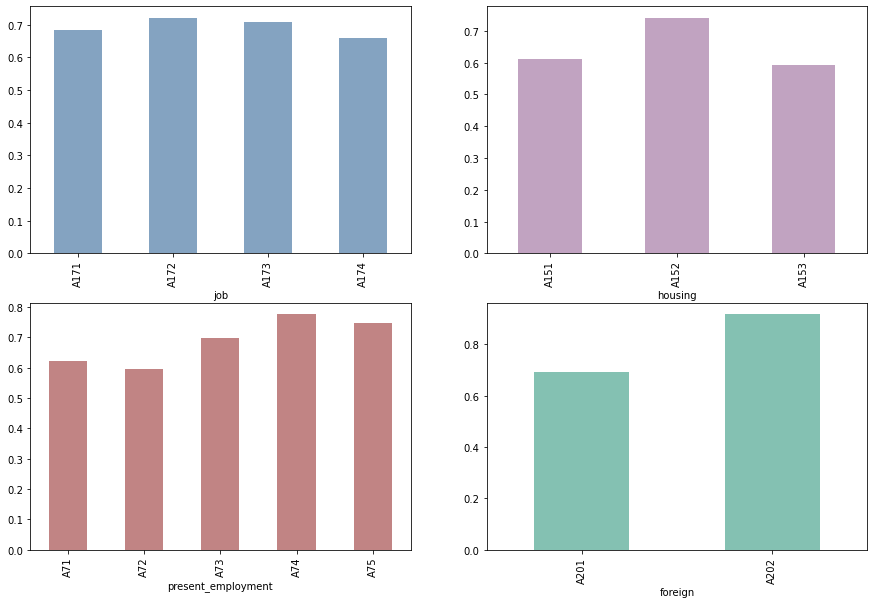

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))


df_cat.groupby('job')['class'].mean().plot.bar(ax=axes[0][0],color=(0.2, 0.4, 0.6, 0.6))
df_cat.groupby('housing')['class'].mean().plot.bar(ax=axes[0][1], color=(0.6, 0.4, 0.6, 0.6))
df_cat.groupby('present_employment')['class'].mean().plot.bar(ax=axes[1][0], color=(0.6, 0.2, 0.2, 0.6))
df_cat.groupby('foreign')['class'].mean().plot.bar(ax=axes[1][1], color=(0.2, 0.6, 0.5, 0.6))

plt.show()

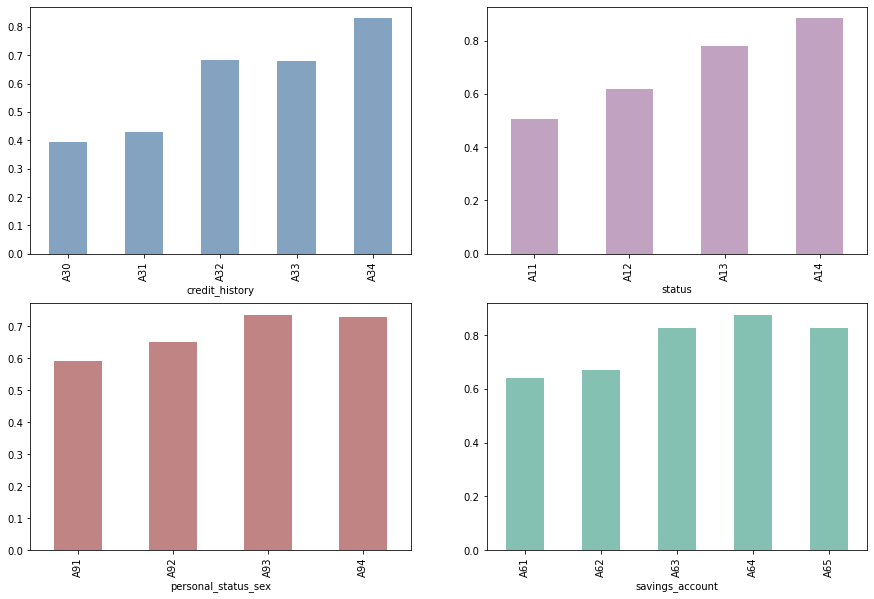

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))


df_cat.groupby('credit_history')['class'].mean().plot.bar(ax=axes[0][0],color=(0.2, 0.4, 0.6, 0.6))
df_cat.groupby('status')['class'].mean().plot.bar(ax=axes[0][1], color=(0.6, 0.4, 0.6, 0.6))
df_cat.groupby('personal_status_sex')['class'].mean().plot.bar(ax=axes[1][0], color=(0.6, 0.2, 0.2, 0.6))
df_cat.groupby('savings_account')['class'].mean().plot.bar(ax=axes[1][1], color=(0.2, 0.6, 0.5, 0.6))

plt.show()

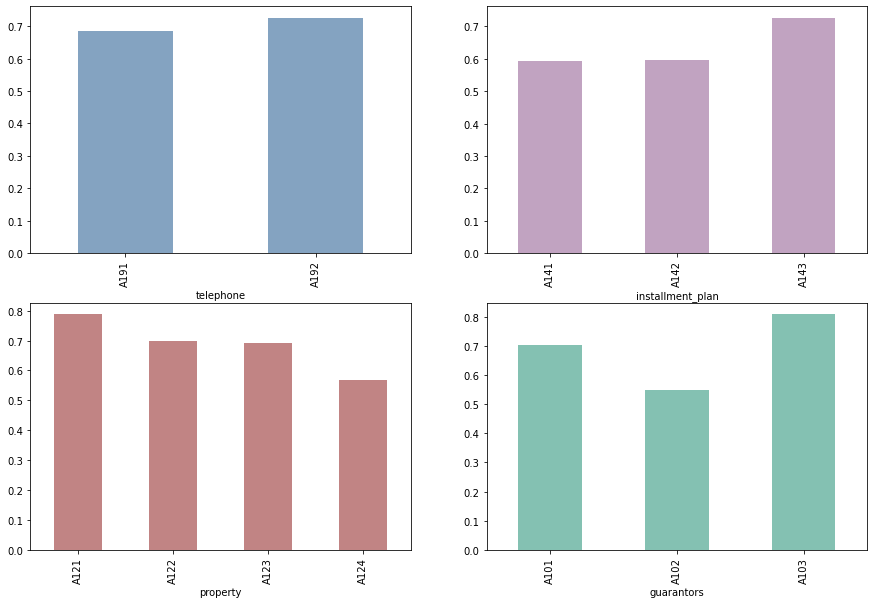

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))


df_cat.groupby('telephone')['class'].mean().plot.bar(ax=axes[0][0],color=(0.2, 0.4, 0.6, 0.6))
df_cat.groupby('installment_plan')['class'].mean().plot.bar(ax=axes[0][1], color=(0.6, 0.4, 0.6, 0.6))
df_cat.groupby('property')['class'].mean().plot.bar(ax=axes[1][0], color=(0.6, 0.2, 0.2, 0.6))
df_cat.groupby('guarantors')['class'].mean().plot.bar(ax=axes[1][1], color=(0.2, 0.6, 0.5, 0.6))

plt.show()

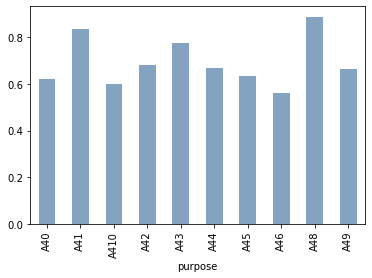

In [19]:
df_cat.groupby('purpose')['class'].mean().plot.bar(color=(0.2, 0.4, 0.6, 0.6))
plt.show()

In [20]:
df_cat.to_csv("dataset/german_clean.csv", index=False)

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df_cat, hue="grade", height=3);
plt.show()
plt.close()